# Predict price of Toyota Corolla based on given attributes

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# reading csv file
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


# Performing EDA to gain Insights

In [ ]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
# finding null values
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
# statistical summary
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
# dropping column cylinder (no variance)
df.drop('Cylinders', axis=1, inplace=True)

In [ ]:
# handling duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
# df #- undo comment to view updated dataset

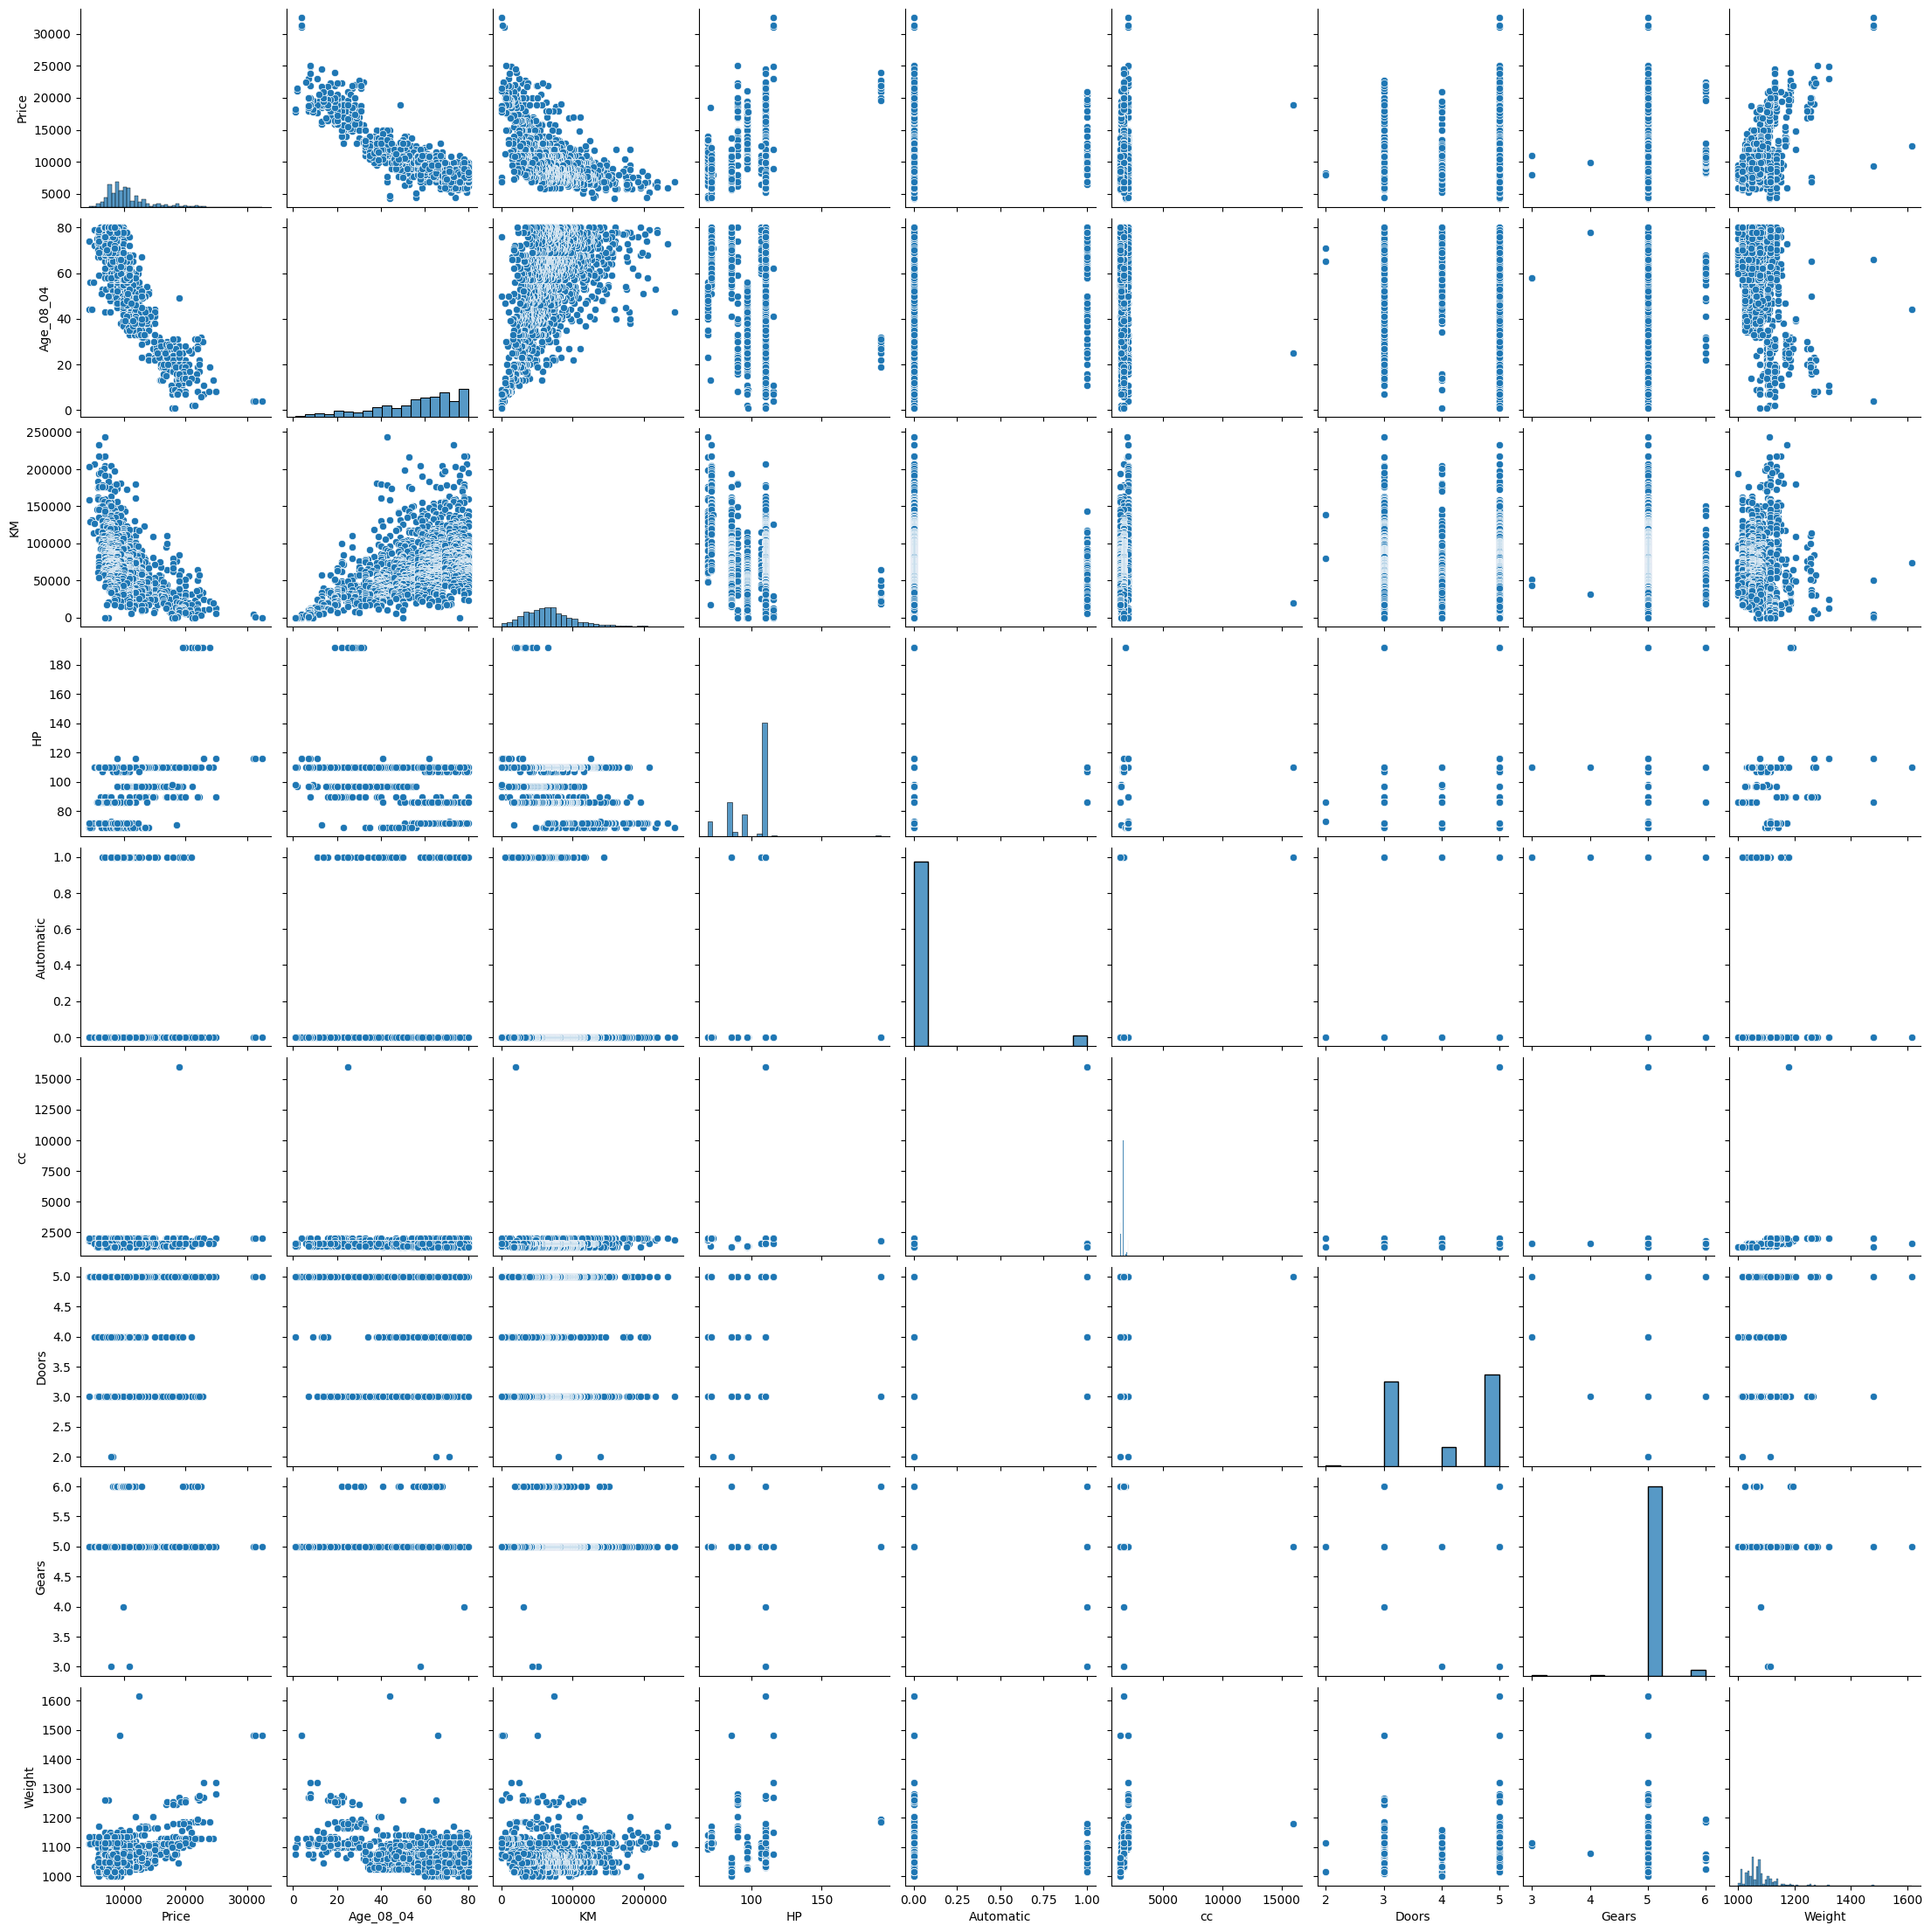

In [ ]:
# scatter plot for numerical columns
import seaborn as sns
sns.pairplot(df)

In [ ]:
# removing potential outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [ ]:
# calling remove_outliers on numerical columns
columns=['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']
for column in columns:
    df = remove_outliers(df, column)

In [ ]:
# one hot enconding
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [ ]:
# correlation matrix
df.corr(numeric_only=True)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.856483,-0.523532,0.138898,-0.004913,0.115090,0.161004,0.021230,0.460322,0.019618,-0.006497
Age_08_04,-0.856483,1.000000,0.457279,-0.026072,0.081962,-0.057344,-0.098184,0.018951,-0.346003,-0.124792,0.107123
KM,-0.523532,0.457279,1.000000,0.007388,-0.047867,0.106609,-0.003190,0.074177,-0.061287,0.109325,-0.201409
HP,0.138898,-0.026072,0.007388,1.000000,-0.043813,0.775381,0.187271,0.071824,0.460372,-0.355776,0.193195
Automatic,-0.004913,0.081962,-0.047867,-0.043813,1.000000,-0.032181,-0.040556,-0.108363,0.136445,-0.027212,0.016094
cc,0.115090,-0.057344,0.106609,0.775381,-0.032181,1.000000,0.170784,0.065524,0.586386,0.305296,-0.265036
Doors,0.161004,-0.098184,-0.003190,0.187271,-0.040556,0.170784,1.000000,-0.160137,0.497666,-0.024138,0.005037
Gears,0.021230,0.018951,0.074177,0.071824,-0.108363,0.065524,-0.160137,1.000000,-0.002168,-0.014825,0.049759
Weight,0.460322,-0.346003,-0.061287,0.460372,0.136445,0.586386,0.497666,-0.002168,1.000000,0.197930,-0.262401
Fuel_Type_Diesel,0.019618,-0.124792,0.109325,-0.355776,-0.027212,0.305296,-0.024138,-0.014825,0.197930,1.000000,-0.690340


# Splitting DATA

In [ ]:
# seperating y,x
y = df['Price']
x = df.drop('Price', axis=1)
# x.info()

In [ ]:
# splitting data into 80 - 20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Building a model

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 1213 to 1377
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age_08_04         947 non-null    int64
 1   KM                947 non-null    int64
 2   HP                947 non-null    int64
 3   Automatic         947 non-null    int64
 4   cc                947 non-null    int64
 5   Doors             947 non-null    int64
 6   Gears             947 non-null    int64
 7   Weight            947 non-null    int64
 8   Fuel_Type_Diesel  947 non-null    bool 
 9   Fuel_Type_Petrol  947 non-null    bool 
dtypes: bool(2), int64(8)
memory usage: 68.4 KB


In [ ]:
#Build model1 - using numerical features
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+cc+Weight',data=df).fit()

In [ ]:
# coefficients
model.params

,0
Intercept,-2227.168586
Age_08_04,-105.600622
KM,-0.014340
HP,26.037640
cc,-2.304978
Weight,19.179033


In [ ]:
# pvalues
model.pvalues

,0
Intercept,1.058785e-01
Age_08_04,2.546141e-251
KM,7.084237e-30
HP,1.060783e-08
cc,6.715717e-09
Weight,2.946974e-37


This model have large negative intercept and great significance for Age factor, which implies price is inversely dependent on Age factor of car.
Then HP and Weight plays a major role in predicting price equation.

In [ ]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.7996498427442134, 0.7987994600733483)

In [ ]:
#Build model2 - Using numerical+categorical features
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Weight+Fuel_Type_Petrol',data=df).fit()
model1.params,model1.pvalues,model1.rsquared,model1.rsquared_adj

(Intercept                  -4318.884391
 Fuel_Type_Petrol[T.True]    1035.845945
 Age_08_04                   -106.730143
 KM                            -0.013350
 HP                            11.224841
 cc                            -1.216073
 Weight                        20.083919
 dtype: float64,
 Intercept                    3.437038e-03
 Fuel_Type_Petrol[T.True]     1.336308e-04
 Age_08_04                   4.604633e-254
 KM                           1.534873e-25
 HP                           5.847769e-02
 cc                           1.219745e-02
 Weight                       6.556030e-40
 dtype: float64,
 0.8021190580004874,
 0.8011103191287822)

Fuel_Type_Petrol plays a major role in predicting price in this model, But not hugely significant compared to Age factor.

In [ ]:
# Build model3 - Using most of the columns
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Weight+Automatic+Doors+Gears+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df).fit()
model2.params,model2.pvalues,model2.rsquared,model2.rsquared_adj

(Intercept                  -10125.115722
 Fuel_Type_Diesel[T.True]   -10487.206760
 Fuel_Type_Petrol[T.True]      898.216910
 Age_08_04                    -111.534748
 KM                             -0.013665
 HP                           -147.680445
 cc                             10.816575
 Weight                         22.483577
 Automatic                    -101.250346
 Doors                         -80.397818
 Gears                         451.030344
 dtype: float64,
 Intercept                    4.779608e-08
 Fuel_Type_Diesel[T.True]     1.377538e-07
 Fuel_Type_Petrol[T.True]     9.151554e-04
 Age_08_04                   8.756601e-242
 KM                           5.215941e-27
 HP                           1.655067e-06
 cc                           4.661219e-06
 Weight                       2.353135e-34
 Automatic                    4.621585e-01
 Doors                        3.267223e-02
 Gears                        3.578079e-03
 dtype: float64,
 0.8094429060140792,
 0.8078183

Automatic has no relevant significance, updating model2

In [ ]:
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Weight+Doors+Gears+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df).fit()
model2.params,model2.pvalues,model2.rsquared,model2.rsquared_adj

(Intercept                   -9736.598248
 Fuel_Type_Diesel[T.True]   -10052.136871
 Fuel_Type_Petrol[T.True]      887.137554
 Age_08_04                    -111.688144
 KM                             -0.013588
 HP                           -140.737740
 cc                             10.326591
 Weight                         22.044891
 Doors                         -74.281303
 Gears                         467.537377
 dtype: float64,
 Intercept                    4.236961e-08
 Fuel_Type_Diesel[T.True]     1.206813e-07
 Fuel_Type_Petrol[T.True]     1.036587e-03
 Age_08_04                   2.407153e-243
 KM                           6.402921e-27
 HP                           1.585167e-06
 cc                           5.115968e-06
 Weight                       6.777562e-37
 Doors                        4.293845e-02
 Gears                        2.271787e-03
 dtype: float64,
 0.8093550162849034,
 0.80789351300259)

Fuel_Type_Diesel plays a role in this model, But not much significant than Age factor.

# Evaluating performance using Evaluation metrix

In [ ]:
# evaluating on testing data
y_pred = model.predict(x_test)
y_pred = y_pred.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
pd.concat([y_test, y_pred], axis=1)

,Price,0
0,11500,10087.860319
1,6750,7305.910227
2,7950,8062.140954
3,11950,12252.920412
4,8750,7241.676303
...,...,...
232,12950,12780.338588
233,8500,8405.258654
234,7750,8270.059777
235,10950,12719.899832


In [ ]:
# rmse
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1025.7541580720265

In [ ]:
# r_squared on test data
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.7852026889662148

In [ ]:
# Model2
y_pred = model1.predict(x_test)
y_pred = y_pred.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
pd.concat([y_test, y_pred], axis=1)

,Price,0
0,11500,10081.632949
1,6750,7312.196641
2,7950,8060.798517
3,11950,12276.765953
4,8750,7254.876870
...,...,...
232,12950,12814.831414
233,8500,8419.113812
234,7750,8290.523759
235,10950,12661.315203


In [ ]:
# rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1036.8251433292012

In [ ]:
# r_squared
r_squared = r2_score(y_test, y_pred)
r_squared

0.780541043985816

In [ ]:
# Model3
y_pred = model2.predict(x_test)
y_pred = y_pred.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
# rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1012.0776135282886

In [ ]:
# r_squared
r_squared = r2_score(y_test, y_pred)
r_squared

0.7908923576980746

# Lasso & Ridge method

In [ ]:
# lasso method
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred1=lasso.predict(x_test)

# Mean squared error
mse = mean_squared_error(y_test, y_pred1)
print("Mean squared error:", mse)

# coefficients
print("Coefficients:", lasso.coef_)

# R-squared
r2 = r2_score(y_test, y_pred1)
print("R-squared:", r2)

Mean squared error: 1055207.0167596894
Coefficients: [-1.11218962e+02 -1.43302054e-02 -1.33005611e+02 -9.93009489e+01
  9.59628933e+00 -8.96473028e+01  3.62231830e+02  2.28861610e+01
 -9.33666583e+03  1.28568196e+03]
R-squared: 0.7845830173191104


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.329e+08, tolerance: 4.855e+05
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Ridge Method
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_pred2=ridge.predict(x_test)

# Mean squared error
mse = mean_squared_error(y_test, y_pred2)
print("Mean squared error:", mse)

# coefficients
print("Coefficients:", ridge.coef_)

# R-squared
r2 = r2_score(y_test, y_pred2)
print("R-squared:", r2)

Mean squared error: 1061500.9828723753
Coefficients: [-1.09880846e+02 -1.43299633e-02 -9.18470151e+01 -4.52068223e+01
  6.44584329e+00 -8.59555152e+01  3.74396517e+02  2.26810957e+01
 -6.63575873e+03  1.31977449e+03]
R-squared: 0.7832981251912566


# Interview Questions


### 1.   What is Normalization & Standardization and how is it helpful?


*   Normalization & Standardization: Data preprocessing techniques used to transform features to a common scale.
$$X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}$$ ranges from 0 to 1.
$$X_{standardized} = \frac{X - \mu}{\sigma}$$ centers data around 0, give each feature a unit variance.

*   Uses: better model performance, better interpretation & handling outliers.

\\

### 2.   What techniques can be used to address multicollinearity in multiple linear regression?



*   Find the Variance Inflation Factor for correlated features, remove the feature that has high VIF.
